# Lasso

### Set initial settings

In [1]:
import sys
import warnings

# Add base directory in path
sys.path.append('../../')

# Ignore future warning
warnings.filterwarnings("ignore", category=FutureWarning)

### Import libs

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
from src.ml import experiment
from src.plot import plot_by_feature_selection_method

### Load original data

In [3]:
# Set a random seed
np.random.seed(7)

# Read the dataset
dataset = pd.read_csv("../../data/df_original_100000.csv")

# Extract the labels
y = np.array(dataset["Label"])
del dataset["Label"]

# Define X (Features)
X = np.array(dataset)

print(f"Shape Features (X): {X.shape}")
print(f"Shape Target (y): {y.shape}")

result = []

Shape Features (X): (100000, 79)
Shape Target (y): (100000,)


### Feature Selection

In [4]:
alpha = 0.01

lasso = Lasso(alpha=alpha)
lasso.fit(X, y)

non_zero_coefs = np.where(lasso.coef_ != 0)[0]
X_selected = X[:, non_zero_coefs]

print(f"Original Features Shape: {X.shape}")
print(f"New Feature Shape: {X_selected.shape}")

Original Features Shape: (100000, 79)
New Feature Shape: (100000, 55)


/home/douglas/.pyenv/versions/3.12.0/envs/env-anonymization-tests/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.628e+02, tolerance: 2.500e+00
  model = cd_fast.enet_coordinate_descent(


### Train models

In [5]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5), 
    "DecisionTree": DecisionTreeClassifier(), 
    "RandomForest":RandomForestClassifier(), 
    "GaussianNB":GaussianNB(var_smoothing=1e-02)
}

In [6]:
final_result = experiment(models=models, X=X_selected, y=y)

KNN Trained
DecisionTree Trained
RandomForest Trained
GaussianNB Trained


### Print and save result file

In [7]:
final_result.to_csv("./lasso_result.csv", index=False)
final_result

,model,anonymized train,anonymized test,accuracy,precision,recall,f1_score
0,KNN,True,True,84.289%,80.649%,94.520%,86.368%
1,KNN,True,False,84.057%,80.310%,94.358%,86.195%
2,KNN,False,True,84.239%,80.616%,94.420%,86.319%
3,KNN,False,False,99.999%,100.000%,99.998%,99.999%
4,DecisionTree,True,True,52.038%,53.491%,49.003%,48.300%
5,DecisionTree,True,False,77.192%,87.484%,60.541%,67.096%
6,DecisionTree,False,True,76.485%,70.161%,92.136%,79.653%
7,DecisionTree,False,False,100.000%,100.000%,100.000%,100.000%
8,RandomForest,True,True,81.332%,79.326%,84.402%,80.579%
9,RandomForest,True,False,75.305%,74.313%,88.502%,79.742%


### Result Plots

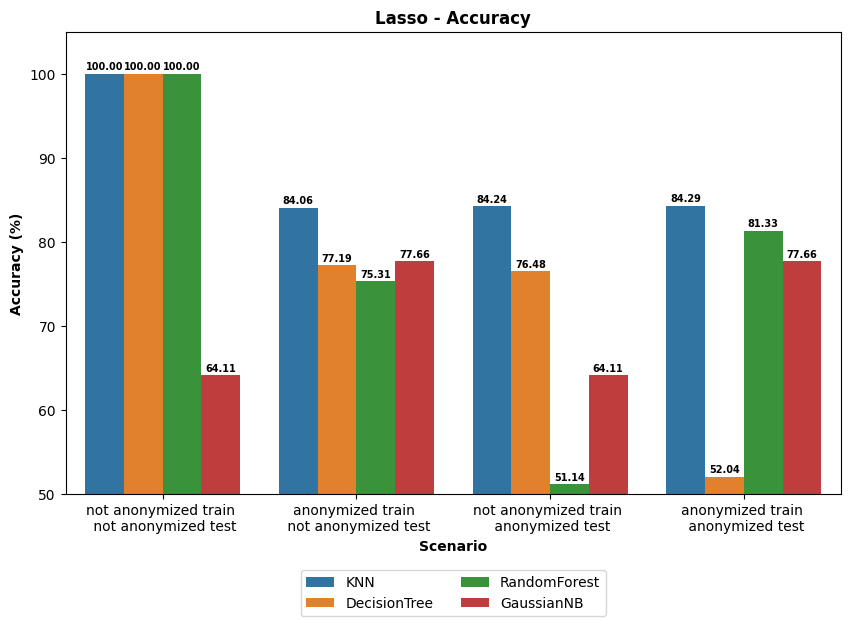

In [8]:
plot_by_feature_selection_method(title="Lasso - Accuracy", metric_name="accuracy", dataframe_file_path="./lasso_result.csv", plot_path="./lasso_accuracy.png", y_lim_bottom=50)

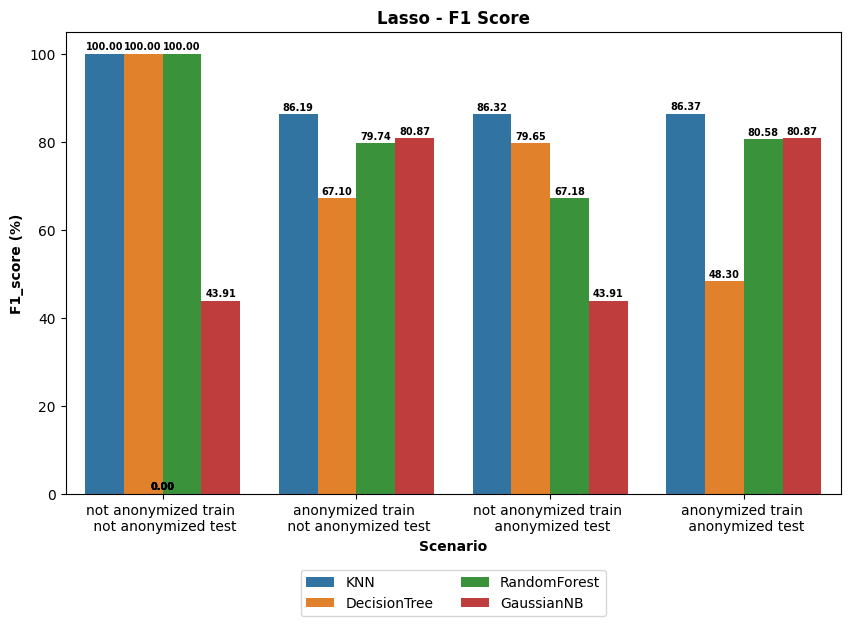

In [9]:
plot_by_feature_selection_method(title="Lasso - F1 Score", metric_name="f1_score", dataframe_file_path="./lasso_result.csv", plot_path="./lasso_f1_score.png")